In [2]:
#!pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### 1. Importing packages

In [38]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px

### 2. Fetching data from repository

In [14]:
# fetch dataset 
mushroom = fetch_ucirepo(id=73)

# data (as pandas dataframes) 
#X = mushroom.data.features 
#y = mushroom.data.targets

# merge dataset for data analysis
df = pd.concat([X, y], axis=1)

### 3. Explanatory Data Analysis

In [13]:
df.head(10)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
5,x,y,y,t,a,f,c,b,n,e,...,w,w,p,w,o,p,k,n,g,e
6,b,s,w,t,a,f,c,b,g,e,...,w,w,p,w,o,p,k,n,m,e
7,b,y,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,s,m,e
8,x,y,w,t,p,f,c,n,p,e,...,w,w,p,w,o,p,k,v,g,p
9,b,s,y,t,a,f,c,b,g,e,...,w,w,p,w,o,p,k,s,m,e


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [18]:
df['poisonous'].unique()

array(['p', 'e'], dtype=object)

In [20]:
df.shape

(8124, 23)

In [21]:
df.isnull().sum() # stalk-root has 2480 empty values

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
poisonous                      0
dtype: int64

In [25]:
df.isna().sum() # stalk-root has 2480 empty values

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
poisonous                      0
dtype: int64

In [27]:
df.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,...,w,w,p,w,o,p,w,v,d,e
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


### 4. Data Preprocessing
Label encoding - preprocessing technique to normalize labels to assign numbers to each of the features.

In [30]:
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()
encoder = LabelEncoder()

for col in df_encoded.columns:
    df_encoded[col] = encoder.fit_transform(df_encoded[col])
    
df_encoded

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,5,2,4,1,6,1,0,1,4,0,...,7,7,0,2,1,4,2,3,5,1
1,5,2,9,1,0,1,0,0,4,0,...,7,7,0,2,1,4,3,2,1,0
2,0,2,8,1,3,1,0,0,5,0,...,7,7,0,2,1,4,3,2,3,0
3,5,3,8,1,6,1,0,1,5,0,...,7,7,0,2,1,4,2,3,5,1
4,5,2,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,5,5,0,1,1,4,0,1,2,0
8120,5,2,4,0,5,0,0,0,11,0,...,5,5,0,0,1,4,0,4,2,0
8121,2,2,4,0,5,0,0,0,5,0,...,5,5,0,1,1,4,0,1,2,0
8122,3,3,4,0,8,1,0,1,0,1,...,7,7,0,2,1,0,7,4,2,1


In [31]:
df_encoded.max()

cap-shape                    5
cap-surface                  3
cap-color                    9
bruises                      1
odor                         8
gill-attachment              1
gill-spacing                 1
gill-size                    1
gill-color                  11
stalk-shape                  1
stalk-root                   4
stalk-surface-above-ring     3
stalk-surface-below-ring     3
stalk-color-above-ring       8
stalk-color-below-ring       8
veil-type                    0
veil-color                   3
ring-number                  2
ring-type                    4
spore-print-color            8
population                   5
habitat                      6
poisonous                    1
dtype: int32

In [32]:
df_encoded.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,...,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616,0.482029
std,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,...,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975,0.499708
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,...,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000,0.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,...,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000,1.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,...,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000,1.000000


In [33]:
df_encoded.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'poisonous'],
      dtype='object')

### 5. Visualizations

In [52]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [119]:
def plot_col(col, hue=None, color=['red', 'green'], labels=None):
    fig, ax = plt.subplots(figsize=(15, 7))
    sns.countplot(x=col, hue=hue, palette=color, saturation=1, data=df_encoded, ax=ax)
    ax.set(title = f"Mushroom {col.title()} Quantity", xlabel=f"{col.title()}", ylabel="Quantity")
    if labels is not None:
        ax.set_xticklabels(labels)
    if hue is not None:
        ax.legend(('Poisonous', 'Edible'), loc=0)

C:\Users\milanszilveszter\AppData\Local\Temp\ipykernel_11868\546893894.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, hue=hue, palette=color, saturation=1, data=df_encoded, ax=ax)
C:\Users\milanszilveszter\AppData\Local\Temp\ipykernel_11868\546893894.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


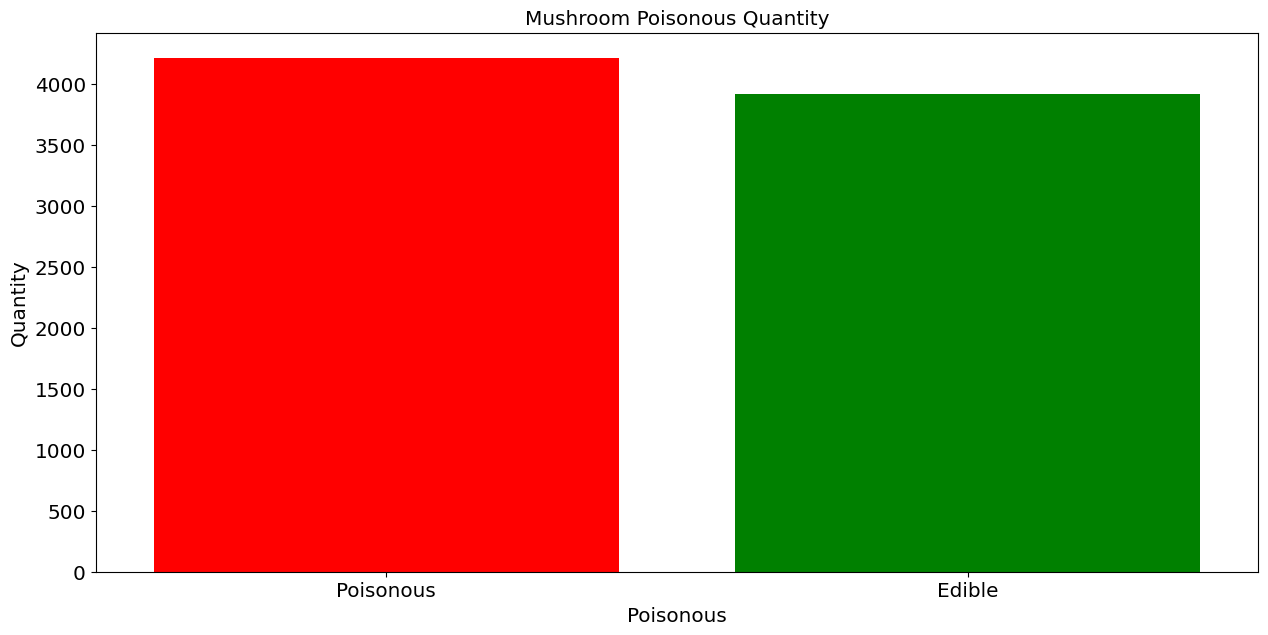

In [120]:
class_dict = ('Poisonous', 'Edible')

plot_col(col='poisonous', labels=class_dict)

C:\Users\milanszilveszter\AppData\Local\Temp\ipykernel_11868\546893894.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


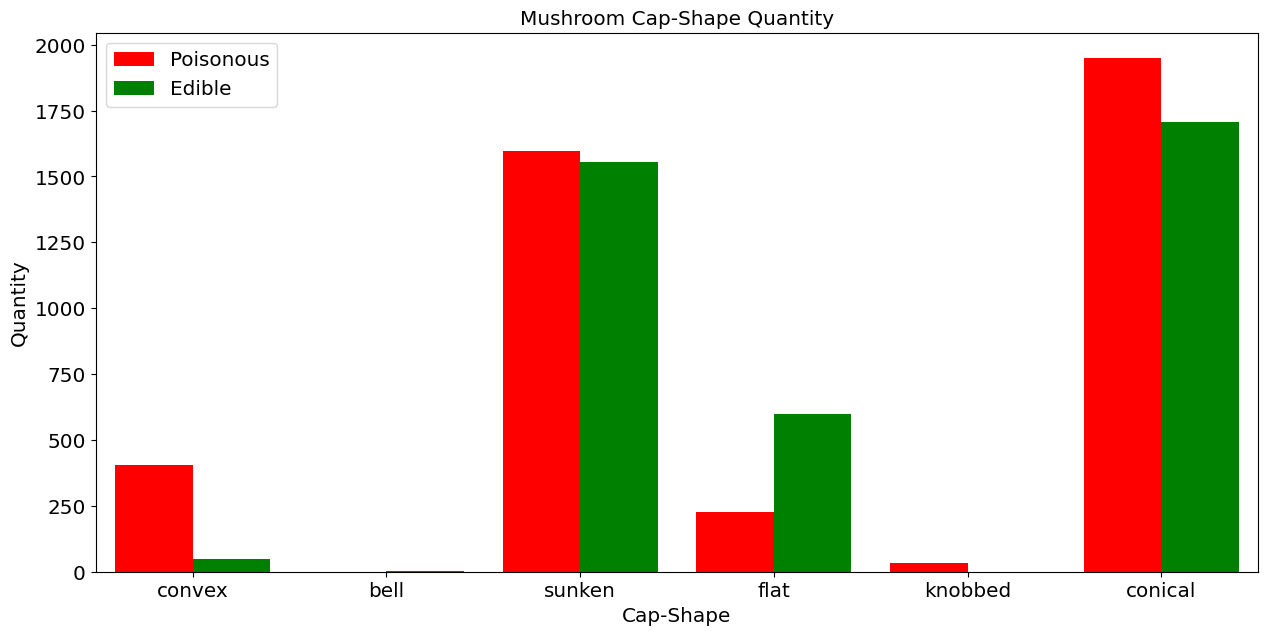

In [121]:
#Visualizing the number of mushrooms for each of the available cap sizes
shape_dict = {"bell":"b", "conical":"c", "convex":"x", "flat":"f", "knobbed":"k","sunken":"s"}

labels = ('convex', 'bell', 'sunken', 'flat', 'knobbed', 'conical')

plot_col(col='cap-shape', hue='poisonous', labels=labels)

C:\Users\milanszilveszter\AppData\Local\Temp\ipykernel_11868\546893894.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, hue=hue, palette=color, saturation=1, data=df_encoded, ax=ax)
C:\Users\milanszilveszter\AppData\Local\Temp\ipykernel_11868\546893894.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


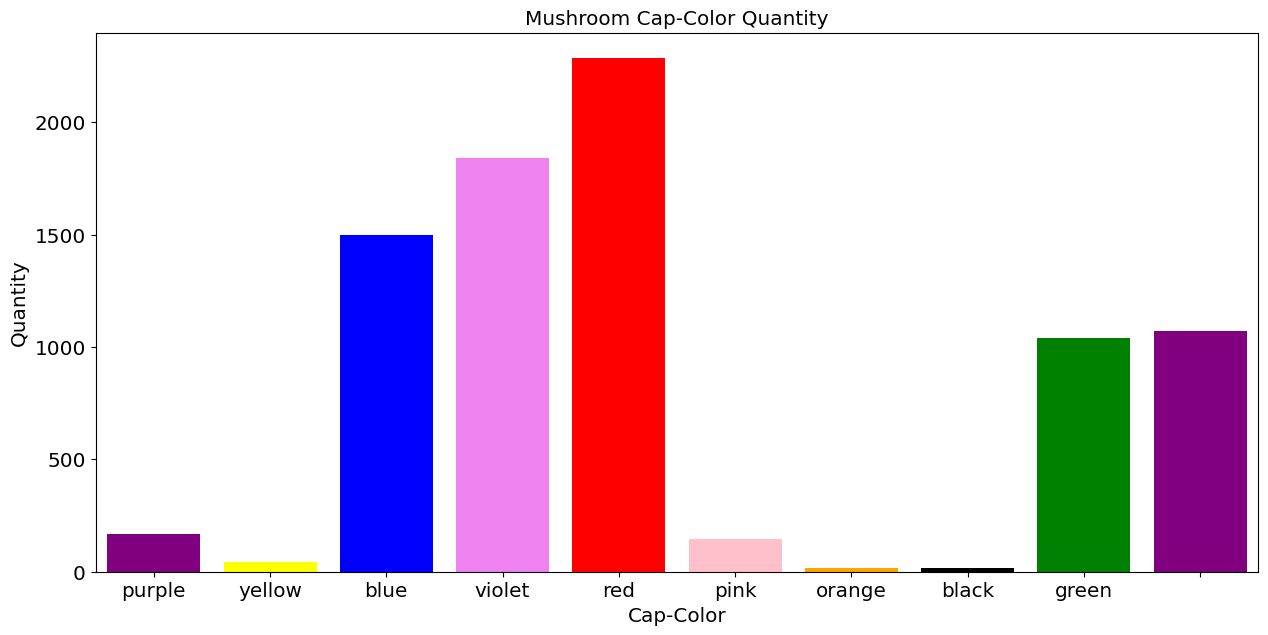

In [122]:
#Visualizing the number of mushrooms for each cap color
color_dict = {"purple":"n","yellow":"y", "blue":"w", "violet":"g", "red":"e","pink":"p",
              "orange":"b", "purple":"u", "black":"c", "green":"r"}

plot_col(col='cap-color', color=color_dict.keys(), labels=color_dict)

C:\Users\milanszilveszter\AppData\Local\Temp\ipykernel_11868\546893894.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


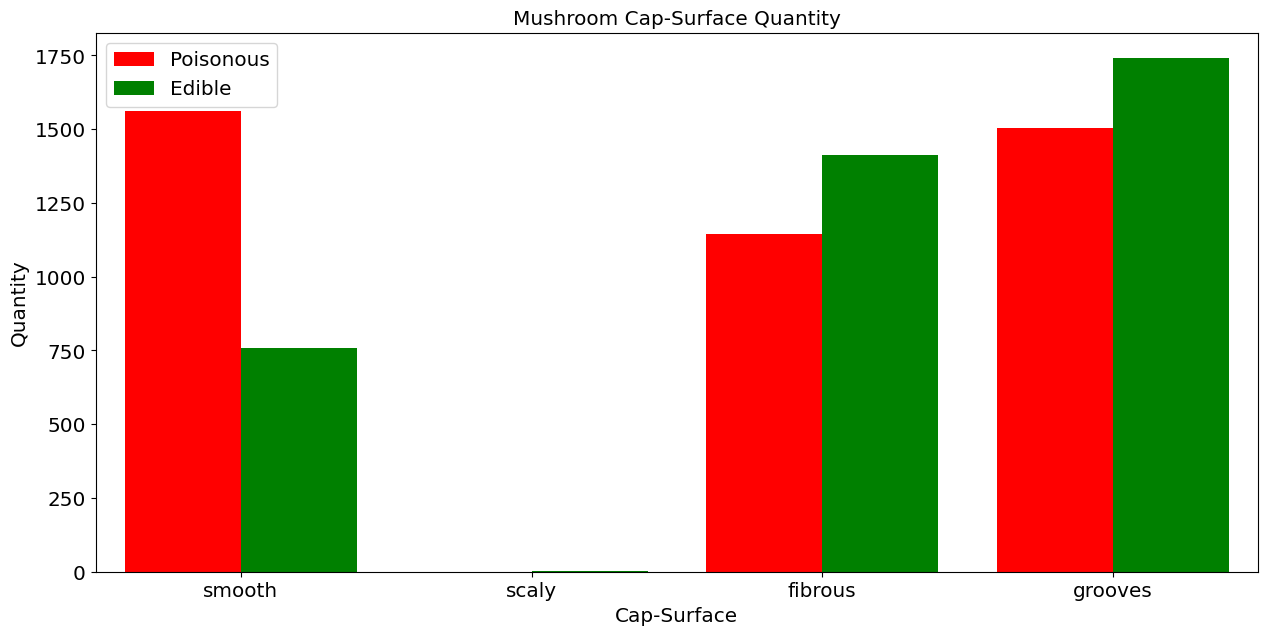

In [125]:
#Visualizing the Mushroom Cap Surface Quantity
surface_dict = {"smooth":"s", "scaly":"y", "fibrous":"f","grooves":"g"}

plot_col(col='cap-surface', hue='poisonous', labels=surface_dict)

In [126]:
# Number of mushrooms based on odor
def get_labels(order, a_dict):
    labels = []
    for values in order:
        for key, value in a_dict.items():
            if values == value:
                labels.append(key)
    return labels

C:\Users\milanszilveszter\AppData\Local\Temp\ipykernel_11868\546893894.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, hue=hue, palette=color, saturation=1, data=df_encoded, ax=ax)
C:\Users\milanszilveszter\AppData\Local\Temp\ipykernel_11868\546893894.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


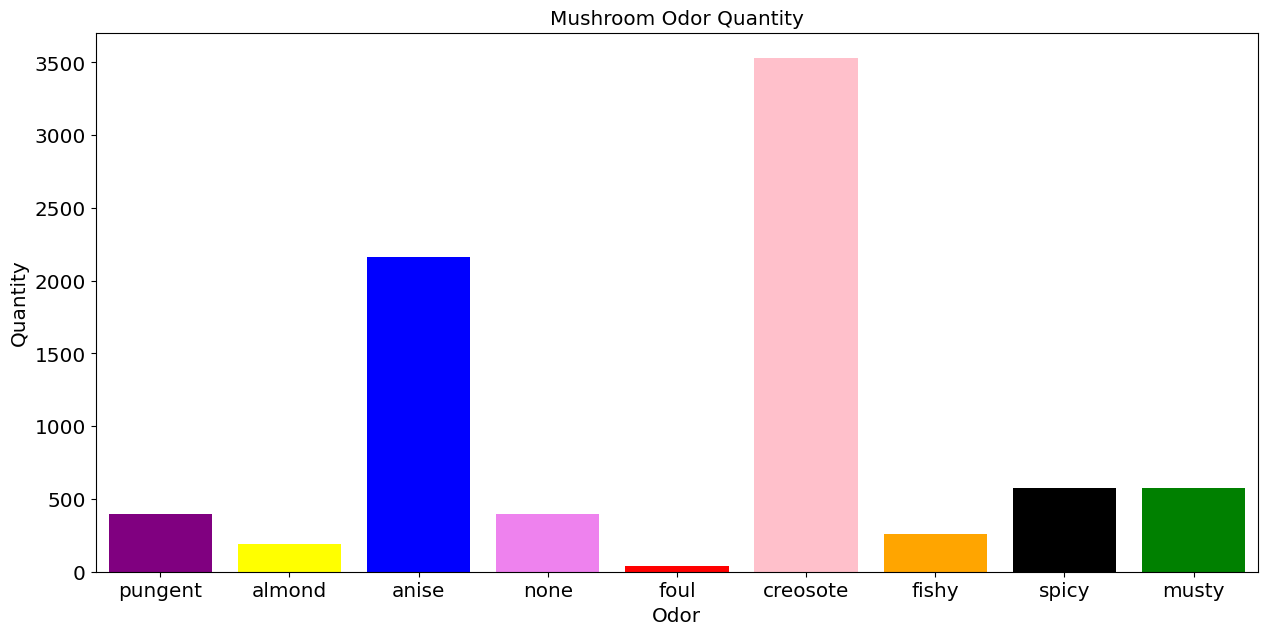

In [127]:
odor_dict = {"almond":"a","anise":"l","creosote":"c","fishy":"y",
             "foul":"f","musty":"m","none":"n","pungent":"p","spicy":"s"}

order = ['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm']

labels = get_labels(order, odor_dict)

plot_col(col='odor', color=color_dict.keys(), labels=labels)

In [138]:
labels = ['Edible', 'Poison']

values = df_encoded['poisonous'].value_counts()

fig=go.Figure(data=[go.Pie(labels=labels, values=values)])

fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=['#87CEFA', '#7FFF00'],
                              line=dict(color='#FFFFFF',width=3)))
fig.show()

In [137]:
#Plot to understand the habitat of different mushrooms
labels = ['Woods', 'Grasses', 'Paths', 'Leaves', 'Urban', 'Meadows', 'Waste']

values = df_encoded['habitat'].value_counts()

colors = ['#DEB887','#778899', '#B22222', '#FFFF00',
          '#F8F8FF','#FFE4C4','#FF69B4']

fig=go.Figure(data=[go.Pie(labels=labels,
                           values=values,
                           #marker_colors=labels,
                           pull=[0.1, 0, 0, 0, 0.2, 0, 0])])

fig.update_traces(title='Mushrooms Habitat Percentage',
                  hoverinfo='label+value',
                  textinfo='percent',
                  opacity=0.9,
                  textfont_size=20,
                  marker=dict(colors=colors,
                              line=dict(color='#000000', width=0.1)),
                  )
fig.show()

In [142]:
labels = ['Brown', 'Gray', 'Red', 'Yellow', 'White', 'Buff', 'Pink',
          'Cinnamon', 'Purple', 'Green']
values = df_encoded['cap-color'].value_counts()
colors = ['#DEB887','#778899', '#B22222', '#FFFF00',
          '#F8F8FF','#FFE4C4','#FF69B4','#F0DC82','#C000C5', '#228B22']

fig=go.Figure(data=[go.Pie(labels=labels,
                           values=values,
                           #marker_colors=labels,
                           pull=[0, 0, 0, 0, 0.2, 0, 0, 0, 0, 0])])
fig.update_traces(title='Mushrooms Color Quantity',
                  hoverinfo='label+percent',
                  textinfo='value',
                  opacity=0.9,
                  textfont_size=20,
                  marker=dict(colors=colors,
                              line=dict(color='#000000', width=0.1)),
                  )
fig.show()

### 6. Machine Learning

In [145]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X = df_encoded.drop(['poisonous'],axis=1)
y = df_encoded['poisonous'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.25)

### Logistic Regression

In [159]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=10000) # solver="newton-cg"
lr.fit(X_train, y_train)

print(f"Test Accuracy: {round(lr.score(X_test, y_test) * 100, 2)}%")

Test Accuracy: 95.57%


### KNN Classification

In [165]:
from sklearn.neighbors import KNeighborsClassifier

best_K_value = 0
best_score=0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    score = knn.score(X_test, y_test)
    print(f"{i}. iteration accuracy: {round(score*100, 2)}%")
          
    if score > best_score:
        best_score = score
        best_K_value = i

print(f"\nBest KNN Value: {best_K_value}")
print(f"Accuracy: {round(best_score * 100, 2)}%")

1. iteration accuracy: 99.95%
2. iteration accuracy: 99.95%
3. iteration accuracy: 99.85%
4. iteration accuracy: 99.9%
5. iteration accuracy: 99.7%
6. iteration accuracy: 99.75%
7. iteration accuracy: 99.61%
8. iteration accuracy: 99.7%
9. iteration accuracy: 99.7%

Best KNN Value: 1
Accuracy: 99.95%


### SVM Classification

In [166]:
from sklearn.svm import SVC

svm = SVC(random_state=42, gamma="auto")
svm.fit(X_train,y_train)
score = svm.score(X_test,y_test)

print(f"Test Accuracy: {round(score * 100, 2)}%")

Test Accuracy: 100.0%


### Naive Bayes Classification

In [167]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train,y_train)
score = nb.score(X_test,y_test)

print(f"Test Accuracy: {round(score*100, 2)}%")

Test Accuracy: 93.11%


### Decision Tree Classifier

In [169]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

score = dt.score(X_test,y_test)

print(f"Test Accuracy: {round(score * 100, 2)}%")

Test Accuracy: 100.0%


### Random Forest Classifier

In [170]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train,y_train)
score = rf.score(X_test,y_test)

print(f"Test Accuracy: {round(score * 100, 2)}%")

Test Accuracy: 100.0%


### Confusion Matrices

Logistic Regression

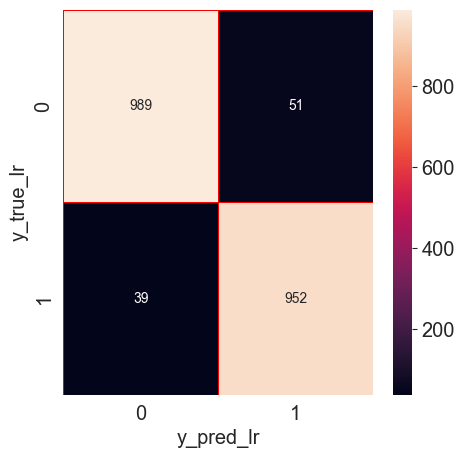

In [171]:
from sklearn.metrics import confusion_matrix

y_pred_lr = lr.predict(X_test)
y_true_lr = y_test

cm = confusion_matrix(y_true_lr, y_pred_lr)

fig, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True, linewidths=0.5, linecolor="red", fmt = ".0f", ax=ax)
plt.xlabel("y_pred_lr")
plt.ylabel("y_true_lr")

plt.show()

Naive Bayes

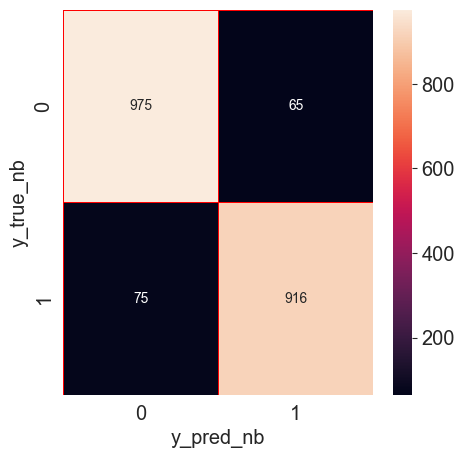

In [172]:
from sklearn.metrics import confusion_matrix

y_pred_nb = nb.predict(X_test)
y_true_nb = y_test

cm = confusion_matrix(y_true_nb, y_pred_nb)

fig, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.5, linecolor="red", fmt = ".0f", ax=ax)
plt.xlabel("y_pred_nb")
plt.ylabel("y_true_nb")
plt.show()